In [1]:
import os, time, sys, string, csv, fiona
import rasterio
from rasterio.plot import show_hist, show
from rasterstats import zonal_stats
import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

* How do nighttime lights change with conflict? Mean, Median, Sum, Std Dev, Whole distribution?
* Look at border cities
* Use shapefiles for 2000

https://pythonhosted.org/rasterstats/manual.html#introduction
    
https://automating-gis-processes.github.io/CSC18/lessons/L6/zonal-statistics.html

https://doi.org/10.6084/m9.figshare.9828827.v2

In [2]:
# Define your own folder 
path = os.path.join(os.path.expanduser('~'), 'Documents/GIS/Rasters/NTL/9828827/')
rastDIR = path + 'rasters/'
shapeDIR = path + 'shapes/'
writeDIR = path + 'results/'
conflictDIR = path + 'conflict/'
print(rastDIR)

/Users/javierparada/Documents/GIS/Rasters/NTL/9828827/rasters/


# Nighttime lights 1992-2018
EPSG = 4326
width = 43201
height = 16801
bands = 1

In [3]:
rasters_NTL =   ['Harmonized_DN_NTL_1992_calDMSP',
                 'Harmonized_DN_NTL_1993_calDMSP',
                 'Harmonized_DN_NTL_1994_calDMSP',
                 'Harmonized_DN_NTL_1995_calDMSP',
                 'Harmonized_DN_NTL_1996_calDMSP',
                 'Harmonized_DN_NTL_1997_calDMSP',
                 'Harmonized_DN_NTL_1998_calDMSP',
                 'Harmonized_DN_NTL_1999_calDMSP',
                 'Harmonized_DN_NTL_2000_calDMSP',
                 'Harmonized_DN_NTL_2001_calDMSP',
                 'Harmonized_DN_NTL_2002_calDMSP',
                 'Harmonized_DN_NTL_2003_calDMSP',
                 'Harmonized_DN_NTL_2004_calDMSP',
                 'Harmonized_DN_NTL_2005_calDMSP',
                 'Harmonized_DN_NTL_2006_calDMSP',
                 'Harmonized_DN_NTL_2007_calDMSP',
                 'Harmonized_DN_NTL_2008_calDMSP',
                 'Harmonized_DN_NTL_2009_calDMSP',
                 'Harmonized_DN_NTL_2010_calDMSP',
                 'Harmonized_DN_NTL_2011_calDMSP',
                 'Harmonized_DN_NTL_2012_calDMSP',
                 'Harmonized_DN_NTL_2013_calDMSP',
                 'Harmonized_DN_NTL_2014_simVIIRS',
                 'Harmonized_DN_NTL_2015_simVIIRS',
                 'Harmonized_DN_NTL_2016_simVIIRS',
                 'Harmonized_DN_NTL_2017_simVIIRS',
                 'Harmonized_DN_NTL_2018_simVIIRS',]

In [4]:
for raster in rasters_NTL: 
    year = int(raster.split('_')[3])
    print(year,': ', raster) 
    rasterio_file = rasterio.open(os.path.join(rastDIR,raster + '.tif'))
    print(rasterio_file.meta)
    array = rasterio_file.read()
    stats = []
    for band in array:
        stats.append({'min': band.min(),'mean': band.mean(),'median': np.median(band),'max': band.max()})
    print(stats)
    print('')

1992 :  Harmonized_DN_NTL_1992_calDMSP
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665)}
[{'min': 0, 'mean': 0.3334457009541681, 'median': 0.0, 'max': 63}]

1993 :  Harmonized_DN_NTL_1993_calDMSP
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665)}
[{'min': 0, 'mean': 0.3505769938130983, 'median': 0.0, 'max': 63}]

1994 :  Harmonized_DN_NTL_1994_calDMSP
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665)}
[{'min': 0, 'mean': 0.3518529713264267, 'median': 0.0, 'max': 6

[{'min': 0, 'mean': 1.0780017482598967, 'median': 0.0, 'max': 63}]

2017 :  Harmonized_DN_NTL_2017_simVIIRS
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665)}
[{'min': 0, 'mean': 1.5042365965332498, 'median': 0.0, 'max': 63}]

2018 :  Harmonized_DN_NTL_2018_simVIIRS
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665)}
[{'min': 0, 'mean': 1.1617314125241363, 'median': 0.0, 'max': 63}]



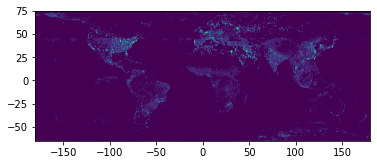

<AxesSubplot:>

In [5]:
show(rasterio_file)

In [6]:
# define stats
stats="min max mean median count sum std"
nodata = -99999 # switch to -9999 for settlements_map

In [8]:
# example
#zStats=zonal_stats(path + "shapes/cities.shp",path + "rasters/Harmonized_DN_NTL_2013_calDMSP.tif", geojson_out=True, all_touched=True, stats=stats, nodata=nodata)
#zStats

In [9]:
fileLength = len(zStats) 
for ROW in range(0,fileLength):
    print(zStats[ROW]["properties"]["PCODE"], zStats[ROW]["properties"]["mean"], sep = '\t')

NameError: name 'zStats' is not defined

## Try cities 2000

In [ ]:
cities2000 = gpd.read_file('/Users/javierparada/Documents/GIS/Shapes/Urban Centre Database/GHS_SMOD_POP2000_GLOBE_R2019A_54009_1K_labelHDC_V2_0/GHS_SMOD_POP2000_GLOBE_R2019A_54009_1K_labelHDC_V2_0.gpkg')
print(len(list(cities2000)))
cities2000.to_file(shapeDIR + "result2.shp")

In [ ]:
cities2000.plot()

In [ ]:
cities2000.describe()

## Calculate zonal statistics

In [10]:
shpList = ['cities']
rastList = rasters_NTL

In [12]:
for shp in shpList:
    for rast in rastList:
        print('\033[1m' + 'Working with raster ' + rast + ' and shapefile '+ shp + ':' +'\033[0;0m')   
        SHAPE = shapeDIR + shp + '.shp'
        RASTER = rastDIR + rast  + '.tif'
        csvFile  = writeDIR + rast + '_' + shp + '.csv'
        print(csvFile)
        zStats = zonal_stats(SHAPE,RASTER, geojson_out=True, all_touched=True,  stats=stats, nodata=nodata)

        # fileLength = len(zStats) 
        w = open(csvFile, 'w')
        DICT = zStats[0]['properties']
        print(DICT.keys())
        csv.writer(w).writerow(DICT.keys())
        fileLength = len(zStats) 
        for ROW in range(0,fileLength):
            records = []
            rowDICT = zStats[ROW]['properties']
            for KEY in DICT.keys():
                newRecord = str(rowDICT[KEY])
                #newRecord = newRecord.encode('utf-8', errors='ignore')
                records = records + [newRecord]
            csv.writer(w).writerow(records)
w.close()
time.sleep(5)

Working with raster Harmonized_DN_NTL_1992_calDMSP and shapefile city_neighborhoods:
/Users/javierparada/Documents/GIS/Rasters/NTL/9828827/results/Harmonized_DN_NTL_1992_calDMSP_city_neighborhoods.csv
odict_keys(['NAME_EN', 'NAM_EN_REF', 'NAME_AR', 'NAM_AR_REF', 'PCODE', 'PREV_PCODE', 'ADM4_EN', 'AREA_EN', 'AREA_AR', 'AREA_PCODE', 'ADM4_AR', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_AR', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'LATITUDE', 'LONGITUDE', 'UPDATE_DAT', 'min', 'max', 'mean', 'count', 'sum', 'std', 'median'])
Working with raster Harmonized_DN_NTL_1993_calDMSP and shapefile city_neighborhoods:
/Users/javierparada/Documents/GIS/Rasters/NTL/9828827/results/Harmonized_DN_NTL_1993_calDMSP_city_neighborhoods.csv
odict_keys(['NAME_EN', 'NAM_EN_REF', 'NAME_AR', 'NAM_AR_REF', 'PCODE', 'PREV_PCODE', 'ADM4_EN', 'AREA_EN', 'AREA_AR', 'AREA_PCODE', 'ADM4_AR', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_AR', 'ADM3_PCODE', 'ADM2_EN'

odict_keys(['NAME_EN', 'NAM_EN_REF', 'NAME_AR', 'NAM_AR_REF', 'PCODE', 'PREV_PCODE', 'ADM4_EN', 'AREA_EN', 'AREA_AR', 'AREA_PCODE', 'ADM4_AR', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_AR', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'LATITUDE', 'LONGITUDE', 'UPDATE_DAT', 'min', 'max', 'mean', 'count', 'sum', 'std', 'median'])
Working with raster Harmonized_DN_NTL_2007_calDMSP and shapefile city_neighborhoods:
/Users/javierparada/Documents/GIS/Rasters/NTL/9828827/results/Harmonized_DN_NTL_2007_calDMSP_city_neighborhoods.csv
odict_keys(['NAME_EN', 'NAM_EN_REF', 'NAME_AR', 'NAM_AR_REF', 'PCODE', 'PREV_PCODE', 'ADM4_EN', 'AREA_EN', 'AREA_AR', 'AREA_PCODE', 'ADM4_AR', 'ADM4_PCODE', 'ADM3_EN', 'ADM3_AR', 'ADM3_PCODE', 'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'LATITUDE', 'LONGITUDE', 'UPDATE_DAT', 'min', 'max', 'mean', 'count', 'sum', 'std', 'median'])
Working

In [11]:
data = pd.read_csv(writeDIR + 'cities/' + 'Harmonized_DN_NTL_1992_calDMSP_cities'+'.csv')
data["UC_NM_MN"].value_counts()

/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (28,59,63,67,79,80,81,82,115,116,117,118,127,128,129,130) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


N/A[IND]                                           221
N/A[ETH]                                           188
Chengguan [CHN]                                    147
N/A[SDN]                                            27
N/A[IDN]                                            13
N/A[NGA]                                            13
N/A[SSD]                                            12
N/A[MDG]                                             9
N/A[GTM]                                             8
N/A[ZWE]                                             7
N/A[VNM]                                             7
Rajgarh [IND]                                        6
Fengcheng [CHN]                                      6
N/A[CHN]                                             5
Raniganj [IND]                                       5
Sahibganj [IND]                                      5
Rampur [IND]                                         4
Raghunathpur [IND]                                   4
Lalganj [I

In [17]:
data.describe()

ID_HDC_G0        QA2_1V          AREA     BBX_LATMN     BBX_LONMN  \
count  13135.000000  13135.000000  13135.000000  13135.000000  13135.000000   
mean    6568.000000      1.176323     50.260830     21.100424     51.795521   
std     3791.892228      0.429571    189.169066     17.966437     58.682289   
min        1.000000      0.000000      1.000000    -54.825090   -158.043016   
25%     3284.500000      1.000000      8.000000     10.760656     19.585115   
50%     6568.000000      1.000000     18.000000     24.368125     73.429889   
75%     9851.500000      1.000000     37.000000     32.654868     90.288306   
max    13135.000000      2.000000   6622.000000     69.303014    178.382096   

          BBX_LATMX     BBX_LONMX     GCPNT_LAT     GCPNT_LON         XBRDR  \
count  13135.000000  13135.000000  13135.000000  13135.000000  13135.000000   
mean      21.165498     51.882079     21.132864     51.838877      0.012181   
std       17.974479     58.675668     17.970380     58.679035      0.109698   
min      -54.785331   -157.730529    -54.803854   -157.893497      0.000000   
25%       10.821730     19.615632     10.792640     19.600961      0.000000   
50%       24.418414     73.499483     24.390754     73.468653      0.000000   
75%       32.732591     90.383252     32.702407     90.340966      0.000000   
max       69.362302    178.526063     69.333682    178.461255      1.000000   

       ...     EX_SS_P90     EX_SS_P00     EX_SS_P15     SDG_A2G14  \
count  ...  1.313500e+04  1.313500e+04  1.313500e+04  13135.000000   
mean   ...  1.920504e+04  2.227410e+04  2.603680e+04      0.290790   
std    ...  2.337269e+05  2.678972e+05  3.149791e+05      0.291329   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00     -0.012064   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00      0.054903   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00      0.182939   
75%    ...  0.000000e+00  0.000000e+00  0.000000e+00      0.461405   
max    ...  1.227889e+07  1.271757e+07  1.504941e+07      1.003432   

                min           max          mean         count            sum  \
count  13135.000000  13135.000000  13135.000000  13135.000000   13135.000000   
mean       6.283289     27.503845     17.167958     93.389494    3108.572288   
std       10.030010     23.804089     18.032556    294.891123   15105.170487   
min        0.000000      0.000000      0.000000      2.000000       0.000000   
25%        0.000000      6.000000      2.763305     21.000000      62.000000   
50%        0.000000     20.000000      9.923077     40.000000     392.000000   
75%        8.000000     54.000000     28.153428     77.000000    1754.000000   
max       63.000000     63.000000     63.000000   9243.000000  555573.000000   

             median  
count  13135.000000  
mean      17.010392  
std       18.996559  
min        0.000000  
25%        2.000000  
50%        9.000000  
75%       26.000000  
max       63.000000  

[8 rows x 68 columns]

In [12]:
data[data["CTR_MN_NM"]=="Syria"][["UC_NM_MN", "sum","ID_HDC_G0"]].sort_values(by="sum",ascending=False)

UC_NM_MN      sum  ID_HDC_G0
3129           Dimashq (Damascus) [SYR]  25019.0       4407
2377               Halab (Aleppo) [SYR]  16067.0       4417
2772                  Hims (Homs) [SYR]   7949.0       4426
2529                     Lattakia [SYR]   5095.0       4317
2642                        Hamah [SYR]   3935.0       4420
2438                     Al-Raqqa [SYR]   3313.0       4564
2142  Al-Qamishli [SYR]; Nusaybin [TUR]   2955.0       4700
2279                   Al-Hasakah [SYR]   2910.0       4672
2580     Deir El-Zor(Deir ez-Zor) [SYR]   2566.0       4658
2693                       Tartus [SYR]   2120.0       4353
2678                       Mihqan [SYR]   1475.0       4703
2570                       Jableh [SYR]   1393.0       4344
2637                      Baniyas [SYR]   1386.0       4349
2467                  Ath-Thawrah [SYR]   1219.0       4540
3278                  As-Suwayda' [SYR]   1128.0       4466
3298                        Dar'A [SYR]   1079.0       4429
2843                    Abu Kamal [SYR]    981.0       4747
2442                        Idlib [SYR]    969.0       4391
2311                       Al-Bab [SYR]    719.0       4460
2601                      Shayzar [SYR]    648.0       4401
2272                       Manbij [SYR]    579.0       4494
2397                   As-Safirah [SYR]    436.0       4456
2176                    Muman Azu [SYR]    384.0       4508
2191      Diyabah [SYR]; As Sadah [IRQ]    210.0       4803

In [26]:
data[["UC_NM_MN", "sum","ID_HDC_G0"]].sort_values(by="sum",ascending=False)

UC_NM_MN       sum  ID_HDC_G0
7375                        Guangzhou, Guangdong [CHN]  543222.0      12080
1515                             New York-Newark [USA]  540073.0        945
3127            Los Angeles-Long Beach-Santa Ana [USA]  522447.0         14
2598                                       Tokyo [JPN]  479027.0      12964
1316                                     Chicago [USA]  400413.0        634
3316                           Dallas-Fort Worth [USA]  345679.0        323
4177                                     Houston [USA]  316143.0        315
12080                                    Jakarta [IDN]  313341.0      11862
3733                                    Shanghai [CHN]  293890.0      12400
2890                        Kinki M.M.A. (Osaka) [JPN]  277625.0      12858
1233                      Detroit [USA]; Windsor [CAN]  268891.0        770
5849                                       Miami [USA]  268417.0        556
126                              Moskva (Moscow) [RUS]  268341.0       3675
2136                                       Seoul [KOR]  247046.0      12389
2786                      Chukyo M.M.A. (Nagoya) [JPN]  229222.0      12914
1106                                     Toronto [CAN]  225516.0        875
429                                       London [GBR]  219069.0       1912
3175                                Phoenix-Mesa [USA]  216845.0         79
4486                                       Delhi [IND]  214717.0       6955
762                                      Seattle [USA]  213725.0        140
1668                                     Beijing [CHN]  206666.0      10687
9142                        Krung Thep (Bangkok) [THA]  200258.0      10715
645                                        Paris [FRA]  198551.0       2046
13083                               Buenos Aires [ARG]  191054.0       1105
8156              Ciudad de Mexico (Mexico City) [MEX]  180009.0        154
3672                             Suzhou, Jiangsu [CHN]  179823.0      12298
2103                       San Francisco-Oakland [USA]  172625.0         10
12843                                  Sao Paulo [BRA]  172191.0       1303
7084                                     Shantou [CHN]  171914.0      12430
3348                    San Diego [USA]; Tijuana [MEX]  164113.0         21
1692                                Philadelphia [USA]  161932.0        898
1830                            Washington, D.C. [USA]  160390.0        855
4040                                    Hangzhou [CHN]  154924.0      12386
4734                        Tampa-St. Petersburg [USA]  153028.0        501
13109                                  Melbourne [AUS]  148316.0      13023
944                         Minneapolis-St. Paul [USA]  147376.0        554
4121                          Al-Qahirah (Cairo) [EGY]  146450.0       3902
7475                          Kolkata (Calcutta) [IND]  145055.0       9691
428                                     Dortmund [DEU]  143679.0       2276
1440                                    Istanbul [TUR]  142435.0       3562
12916                               Johannesburg [ZAF]  141097.0       3673
1696                               Denver-Aurora [USA]  139522.0        272
2534                                      Tehran [IRN]  138634.0       5737
9003                                      Manila [PHL]  130945.0      12829
895                                     Montreal [CAN]  126741.0       1017
6957                                       Dhaka [BGD]  123976.0       9872
12807                             Rio de Janeiro [BRA]  122779.0       1361
3890                                     Chengdu [CHN]  122640.0      10297
13063                                     Sydney [AUS]  120711.0      13043
3094                                     Atlanta [USA]  118500.0        559
1691                                Indianapolis [USA]  112068.0        651
1806                                 Kansas City [USA]  110651.0        411
9907    Thanh Pho 

## appended data

In [13]:
appended_data = []

for raster in rasters_NTL: 
    print(raster)
    data = pd.read_csv(writeDIR + 'cities/' + raster +'_cities'+'.csv')
    data["year"] = int(raster.split('_')[3])
    appended_data.append(data)
appended_data = pd.concat(appended_data)
appended_data["cv"] = appended_data["std"]/appended_data["mean"]

Harmonized_DN_NTL_1992_calDMSP


/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (28,59,63,67,79,80,81,82,115,116,117,118,127,128,129,130) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Harmonized_DN_NTL_1993_calDMSP
Harmonized_DN_NTL_1994_calDMSP
Harmonized_DN_NTL_1995_calDMSP
Harmonized_DN_NTL_1996_calDMSP
Harmonized_DN_NTL_1997_calDMSP
Harmonized_DN_NTL_1998_calDMSP
Harmonized_DN_NTL_1999_calDMSP
Harmonized_DN_NTL_2000_calDMSP
Harmonized_DN_NTL_2001_calDMSP
Harmonized_DN_NTL_2002_calDMSP
Harmonized_DN_NTL_2003_calDMSP
Harmonized_DN_NTL_2004_calDMSP
Harmonized_DN_NTL_2005_calDMSP
Harmonized_DN_NTL_2006_calDMSP
Harmonized_DN_NTL_2007_calDMSP
Harmonized_DN_NTL_2008_calDMSP
Harmonized_DN_NTL_2009_calDMSP
Harmonized_DN_NTL_2010_calDMSP
Harmonized_DN_NTL_2011_calDMSP
Harmonized_DN_NTL_2012_calDMSP
Harmonized_DN_NTL_2013_calDMSP
Harmonized_DN_NTL_2014_simVIIRS
Harmonized_DN_NTL_2015_simVIIRS
Harmonized_DN_NTL_2016_simVIIRS
Harmonized_DN_NTL_2017_simVIIRS
Harmonized_DN_NTL_2018_simVIIRS


| City        | Neighborhoods |
|-------------|---------------|
| Al-Hasakeh  | 31            |
| Aleppo      | 108           |
| Ar-Raqqa    | 23            |
| As-Sweida   | 10            |
| Damascus    | 97            |
| Dar'a       | 20            |
| Deir-ez-Zor | 19            |
| Hama        | 35            |
| Homs        | 36            |
| Idleb       | 5             |
| Lattakia    | 17            |
| Tartous     | 9             |
| Yarmuk      | 3             |

Al-Hasakah [SYR]
Halab (Aleppo) [SYR]
Al-Raqqa [SYR]
As-Suwayda' [SYR]
Dimashq (Damascus) [SYR]
Dar'A [SYR]
Deir El-Zor(Deir ez-Zor) [SYR]
Hamah [SYR]
Hims (Homs) [SYR]
Idlib [SYR]
Lattakia [SYR]
Tartus [SYR]

In [16]:
# 12 Syrian cities and 400 neighborhoods
# Al-Hasakeh, Aleppo, Ar-Raqqa, As-Sweida, Damascus, Dar'a, Deir-ez-Zor, Hama 
# Homs, Idleb, Lattakia, Tartous, Yarmuk 

appended_data2 = []

for raster in rasters_NTL: 
    print(raster)
    data = pd.read_csv(writeDIR + 'city_neighborhoods/' + raster +'_city_neighborhoods'+'.csv')
    data["year"] = int(raster.split('_')[3])
    appended_data2.append(data)
appended_data2 = pd.concat(appended_data2)
appended_data2["cv"] = appended_data2["std"]/appended_data2["mean"]

Harmonized_DN_NTL_1992_calDMSP
Harmonized_DN_NTL_1993_calDMSP
Harmonized_DN_NTL_1994_calDMSP
Harmonized_DN_NTL_1995_calDMSP
Harmonized_DN_NTL_1996_calDMSP
Harmonized_DN_NTL_1997_calDMSP
Harmonized_DN_NTL_1998_calDMSP
Harmonized_DN_NTL_1999_calDMSP
Harmonized_DN_NTL_2000_calDMSP
Harmonized_DN_NTL_2001_calDMSP
Harmonized_DN_NTL_2002_calDMSP
Harmonized_DN_NTL_2003_calDMSP
Harmonized_DN_NTL_2004_calDMSP
Harmonized_DN_NTL_2005_calDMSP
Harmonized_DN_NTL_2006_calDMSP
Harmonized_DN_NTL_2007_calDMSP
Harmonized_DN_NTL_2008_calDMSP
Harmonized_DN_NTL_2009_calDMSP
Harmonized_DN_NTL_2010_calDMSP
Harmonized_DN_NTL_2011_calDMSP
Harmonized_DN_NTL_2012_calDMSP
Harmonized_DN_NTL_2013_calDMSP
Harmonized_DN_NTL_2014_simVIIRS
Harmonized_DN_NTL_2015_simVIIRS
Harmonized_DN_NTL_2016_simVIIRS
Harmonized_DN_NTL_2017_simVIIRS
Harmonized_DN_NTL_2018_simVIIRS


In [18]:
appended_data2.to_csv('csv/city_neighborhoods.csv')

In [14]:
appended_data[appended_data["UC_NM_MN"] == 'Halab (Aleppo) [SYR]'][["UC_NM_MN", "year", "mean","sum", "std","cv", "count",]]

UC_NM_MN  year       mean      sum        std        cv  \
2377  Halab (Aleppo) [SYR]  1992  31.258755  16067.0  19.188832  0.613871   
2377  Halab (Aleppo) [SYR]  1993  30.159533  15502.0  17.961964  0.595565   
2377  Halab (Aleppo) [SYR]  1994  32.500000  16705.0  19.304870  0.593996   
2377  Halab (Aleppo) [SYR]  1995  38.033074  19549.0  17.549066  0.461416   
2377  Halab (Aleppo) [SYR]  1996  40.155642  20640.0  17.087299  0.425527   
2377  Halab (Aleppo) [SYR]  1997  40.511673  20823.0  16.997507  0.419571   
2377  Halab (Aleppo) [SYR]  1998  41.616732  21391.0  16.475751  0.395892   
2377  Halab (Aleppo) [SYR]  1999  43.850195  22539.0  16.146307  0.368215   
2377  Halab (Aleppo) [SYR]  2000  43.821012  22524.0  15.793508  0.360409   
2377  Halab (Aleppo) [SYR]  2001  45.367704  23319.0  15.367958  0.338742   
2377  Halab (Aleppo) [SYR]  2002  47.151751  24236.0  14.901895  0.316041   
2377  Halab (Aleppo) [SYR]  2003  48.252918  24802.0  14.486887  0.300228   
2377  Halab (Aleppo) [SYR]  2004  49.036965  25205.0   9.382729  0.191340   
2377  Halab (Aleppo) [SYR]  2005  49.169261  25273.0  11.398364  0.231819   
2377  Halab (Aleppo) [SYR]  2006  52.463035  26966.0  10.187713  0.194188   
2377  Halab (Aleppo) [SYR]  2007  53.239300  27365.0   9.095640  0.170844   
2377  Halab (Aleppo) [SYR]  2008  49.599222  25494.0   9.856503  0.198723   
2377  Halab (Aleppo) [SYR]  2009  50.282306  25292.0   8.282045  0.164711   
2377  Halab (Aleppo) [SYR]  2010  54.469185  27398.0   5.873293  0.107828   
2377  Halab (Aleppo) [SYR]  2011  56.731610  28536.0   7.001671  0.123417   
2377  Halab (Aleppo) [SYR]  2012  46.978599  24147.0  11.776020  0.250668   
2377  Halab (Aleppo) [SYR]  2013  19.289883   9915.0  14.105068  0.731216   
2377  Halab (Aleppo) [SYR]  2014  15.575875   8006.0  11.763190  0.755219   
2377  Halab (Aleppo) [SYR]  2015  10.435798   5364.0   6.648247  0.637062   
2377  Halab (Aleppo) [SYR]  2016   8.381323   4308.0   4.636864  0.553238   
2377  Halab (Aleppo) [SYR]  2017  14.285992   7343.0  10.939608  0.765758   
2377  Halab (Aleppo) [SYR]  2018  21.206226  10900.0  16.748549  0.789794   

      count  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    503  
2377    503  
2377    503  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514  
2377    514

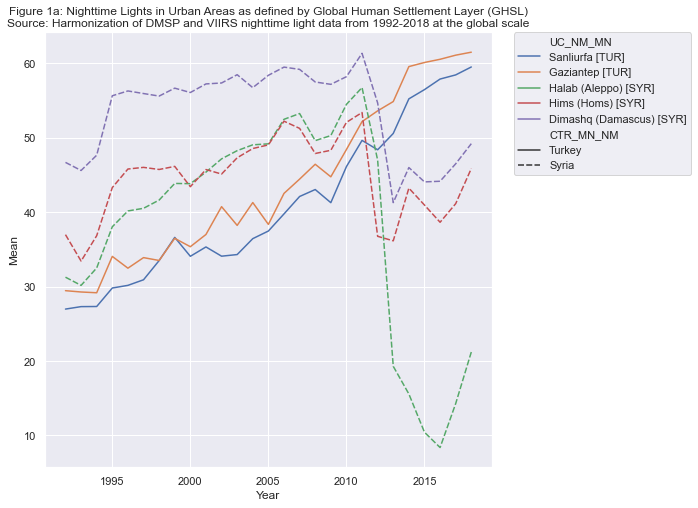

In [67]:
sns.set_theme(style="darkgrid")

city_list = ['Halab (Aleppo) [SYR]','Gaziantep [TUR]', 'Sanliurfa [TUR]','Dimashq (Damascus) [SYR]', 'Hims (Homs) [SYR]',]
country_list = ['Syria']

filtered_df = appended_data[appended_data['UC_NM_MN'].isin(city_list)]

f = plt.figure(figsize=(8, 8))

# Plot the responses for different events and regions

ax = sns.lineplot(x="year", y="mean", data=filtered_df, hue="UC_NM_MN", style="CTR_MN_NM" )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('''Figure 1a: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

ax.set_ylabel('Mean')
ax.set_xlabel('Year')

plt.savefig('NTL_figure1a.pdf', bbox_inches='tight')                                          

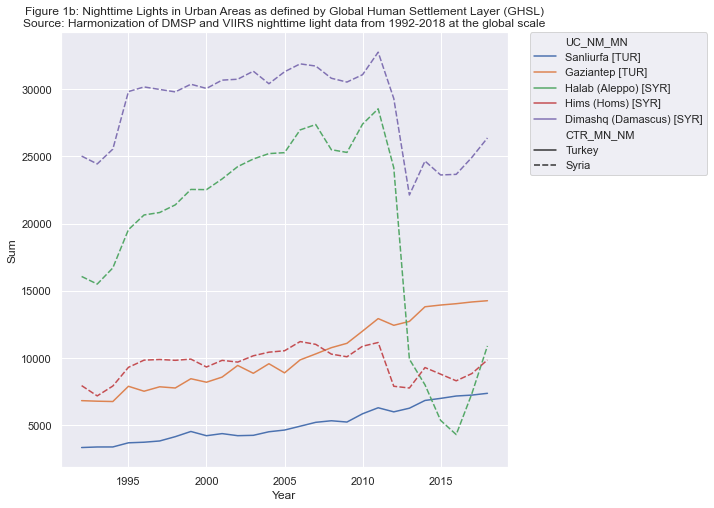

In [57]:
g = plt.figure(figsize=(8, 8))

# Plot the responses for different events and regions

ax = sns.lineplot(x="year", y="sum", data=filtered_df, hue="UC_NM_MN", style="CTR_MN_NM" )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('''Figure 1b: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

ax.set_ylabel('Sum')
ax.set_xlabel('Year')

plt.savefig('NTL_figure1b.pdf', bbox_inches='tight')         

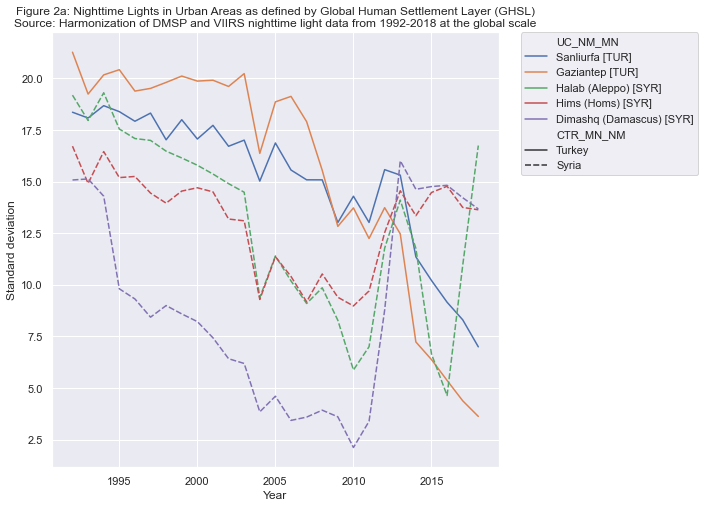

In [58]:
g = plt.figure(figsize=(8, 8))

# Plot the responses for different events and regions

ax = sns.lineplot(x="year", y="std", data=filtered_df, hue="UC_NM_MN", style="CTR_MN_NM" )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('''Figure 2a: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

ax.set_ylabel('Standard deviation')
ax.set_xlabel('Year')

plt.savefig('NTL_figure2a.pdf', bbox_inches='tight')    

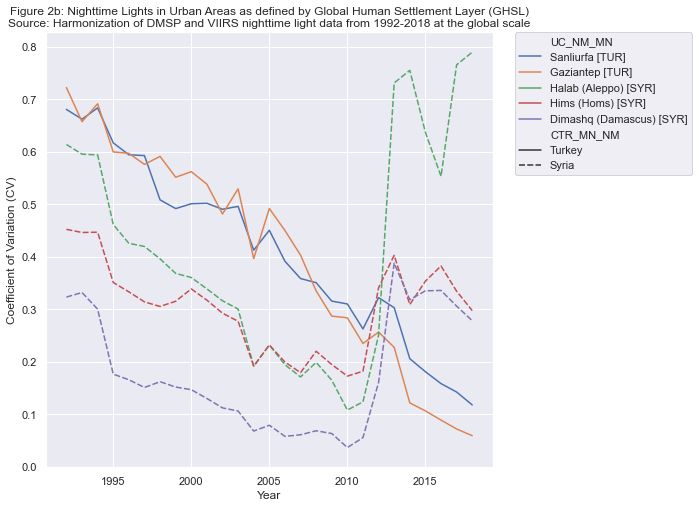

In [59]:
g = plt.figure(figsize=(8, 8))

# Plot the responses for different events and regions

ax = sns.lineplot(x="year", y="cv", data=filtered_df, hue="UC_NM_MN", style="CTR_MN_NM" )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('''Figure 2b: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

ax.set_ylabel('Coefficient of Variation (CV)')
ax.set_xlabel('Year')

plt.savefig('NTL_figure2b.pdf', bbox_inches='tight')    

In [15]:
appended_data2["ADM4_EN"].value_counts()

NameError: name 'appended_data2' is not defined

No handles with labels found to put in legend.


<Figure size 576x576 with 0 Axes>

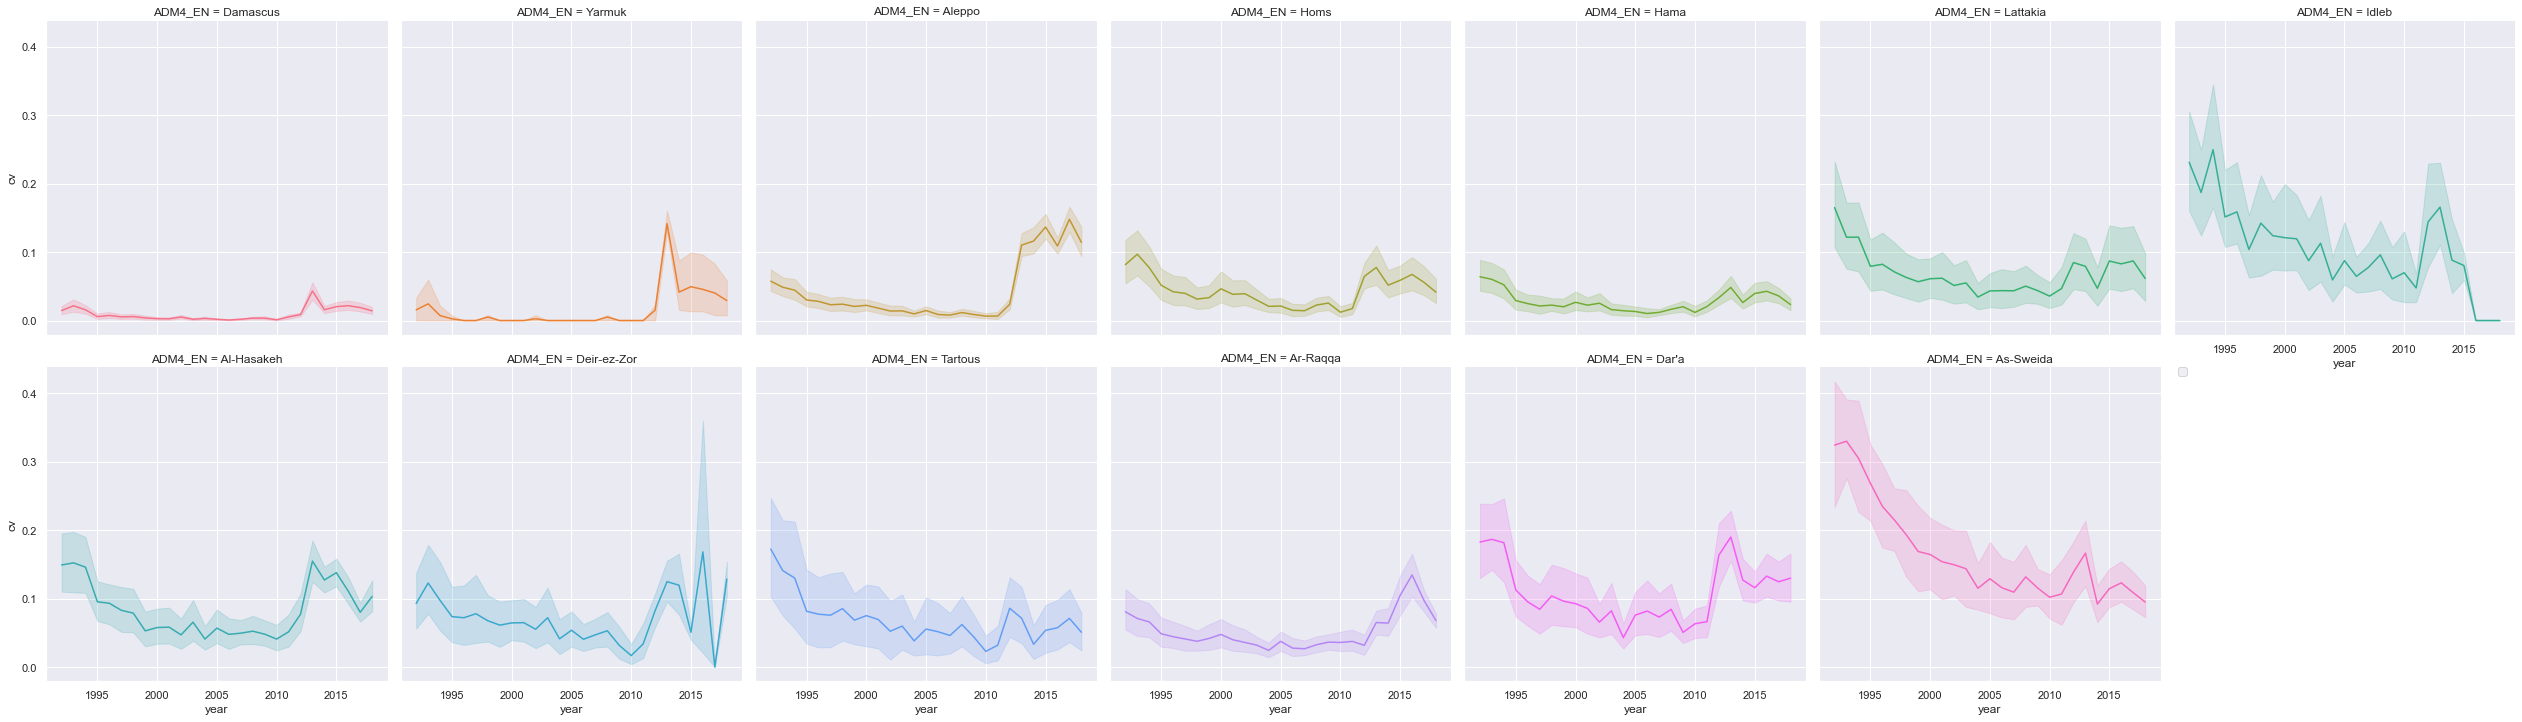

In [75]:
sns.set_theme(style="darkgrid")

city_list = ['Homs','Aleppo','Damascus']
country_list = ['Syria']

filtered_df = appended_data2
#[appended_data2['ADM4_EN'].isin(city_list)]

f = plt.figure(figsize=(8, 8))

# Plot the responses for different events and regions

# ax = sns.lineplot(x="year", y="mean", data=filtered_df, hue="ADM4_EN", col="ADM4_EN")

ax = sns.relplot(
    data=filtered_df, x="year", y="cv",
    col="ADM4_EN", hue="ADM4_EN", col_wrap=7,
    kind="line", legend=False,
)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# ax.set_title('''Figure 1a: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
# Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

#ax.set_ylabel('Mean')
#ax.set_xlabel('Year')

plt.savefig('NTL_figure1a.png', bbox_inches='tight')     

In [11]:
appended_data.head()

ID_HDC_G0  QA2_1V  AREA  BBX_LATMN  BBX_LONMN  BBX_LATMX  BBX_LONMX  \
0       5782       1    23  69.303014  88.108033  69.362302  88.296220   
1       3316       1    72  68.866046  32.988859  69.054626  33.160407   
2       5645       1    36  66.067184  76.486580  66.101046  76.816776   
3       3185       1    37  64.980756  25.406867  65.058622  25.561199   
4       3539       1    51  64.537350  39.738776  64.614759  39.933162   

   GCPNT_LAT  GCPNT_LON CTR_MN_NM  ...         SDG_OS15MX   min   max  \
0  69.333682  88.205172    Russia  ...              86.61  61.0  63.0   
1  68.955354  33.078645    Russia  ...              61.42   0.0  63.0   
2  66.083799  76.646580    Russia  ...              32.17  51.0  63.0   
3  65.019378  25.482396   Finland  ...  66.81999999999999  51.0  63.0   
4  64.572142  39.831477    Russia  ...              58.41  35.0  63.0   

        mean count      sum        std median  year        cv  
0  62.958333   120   7555.0   0.237902   63.0  1992  0.003779  
1   6.564189   296   1943.0  19.195191    0.0  1992  2.924229  
2  61.206667   150   9181.0   2.774399   63.0  1992  0.045328  
3  62.625000   144   9018.0   1.373737   63.0  1992  0.021936  
4  57.863388   183  10589.0   6.357984   60.0  1992  0.109879  

[5 rows x 169 columns]

## UCDP

In [16]:
df = pd.read_csv(conflictDIR + 'ged201.csv', low_memory=False)
ucdp_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
ucdp_df.crs = 'epsg:4326'
cities = gpd.read_file(shapeDIR + 'cities.shp')

In [9]:
print(ucdp_df.crs)
print(cities.crs)

epsg:4326
epsg:4326


In [10]:
conflict_within_city = gpd.sjoin(ucdp_df, 
                                 cities, 
                                 how="left", 
                                 op='within')

In [11]:
pd.set_option('display.max_columns', None)
conflict_within_city["count_events"] = 1

In [12]:
collapsed = conflict_within_city.groupby(['ID_HDC_G0', 'year']).sum()[['best','count_events']]

In [13]:
collapsed

best  count_events
ID_HDC_G0 year                    
14.0      2015    14             1
19.0      2008    15             4
          2015     1             1
          2018     3             3
20.0      2008     3             1
...              ...           ...
13095.0   2002     7             3
13116.0   1999    60             2
          2000    10             1
13120.0   2001     4             1
13122.0   1989     1             1

[8967 rows x 2 columns]

In [17]:
merged = appended_data.merge(collapsed, how='left', sort=True, left_on=['ID_HDC_G0','year'], right_on=['ID_HDC_G0','year'])
merged['best'] = merged['best'].fillna(0)
merged['count_events'] = merged['count_events'].fillna(0)
#filtered_merged = filtered_merged[filtered_merged["year"]>=2009]

In [18]:
merged

ID_HDC_G0  QA2_1V  AREA  BBX_LATMN   BBX_LONMN  BBX_LATMX   BBX_LONMX  \
0               1       1   185  21.247683 -158.043016  21.422193 -157.730529   
1               1       1   185  21.247683 -158.043016  21.422193 -157.730529   
2               1       1   185  21.247683 -158.043016  21.422193 -157.730529   
3               1       1   185  21.247683 -158.043016  21.422193 -157.730529   
4               1       1   185  21.247683 -158.043016  21.422193 -157.730529   
...           ...     ...   ...        ...         ...        ...         ...   
354640      13135       1    64 -18.152220  178.382096 -18.045020  178.526063   
354641      13135       1    64 -18.152220  178.382096 -18.045020  178.526063   
354642      13135       1    64 -18.152220  178.382096 -18.045020  178.526063   
354643      13135       1    64 -18.152220  178.382096 -18.045020  178.526063   
354644      13135       1    64 -18.152220  178.382096 -18.045020  178.526063   

        GCPNT_LAT   GCPNT_LON      CTR_MN_NM CTR_MN_ISO  XBRDR  XCTR_NBR  \
0       21.340678 -157.893497  United States        USA      0         1   
1       21.340678 -157.893497  United States        USA      0         1   
2       21.340678 -157.893497  United States        USA      0         1   
3       21.340678 -157.893497  United States        USA      0         1   
4       21.340678 -157.893497  United States        USA      0         1   
...           ...         ...            ...        ...    ...       ...   
354640 -18.104802  178.461255           Fiji        FJI      0         1   
354641 -18.104802  178.461255           Fiji        FJI      0         1   
354642 -18.104802  178.461255           Fiji        FJI      0         1   
354643 -18.104802  178.461255           Fiji        FJI      0         1   
354644 -18.104802  178.461255           Fiji        FJI      0         1   

            XC_NM_LST XC_ISO_LST           GRGN_L1           GRGN_L2  \
0       United States        USA  Northern America  Northern America   
1       United States        USA  Northern America  Northern America   
2       United States        USA  Northern America  Northern America   
3       United States        USA  Northern America  Northern America   
4       United States        USA  Northern America  Northern America   
...               ...        ...               ...               ...   
354640           Fiji        FJI           Oceania         Melanesia   
354641           Fiji        FJI           Oceania         Melanesia   
354642           Fiji        FJI           Oceania         Melanesia   
354643           Fiji        FJI           Oceania         Melanesia   
354644           Fiji        FJI           Oceania         Melanesia   

              UC_NM_MN               UC_NM_LST UC_NM_SRC  H75_NBR  H90_NBR  \
0       Honolulu [USA]          Honolulu [USA]       WUP        1        1   
1       Honolulu [USA]          Honolulu [USA]       WUP        1        1   
2       Honolulu [USA]          Honolulu [USA]       WUP        1        1   
3       Honolulu [USA]          Honolulu [USA]       WUP        1        1   
4       Honolulu [USA]          Honolulu [USA]       WUP        1        1   
...                ...                     ...       ...      ...      ...   
354640      Suva [FJI]  Suva [FJI]; Lami [FJI]     GRUMP        1        1   
354641      Suva [FJI]  Suva [FJI]; Lami [FJI]     GRUMP        1        1   
354642      Suva [FJI]  Suva [FJI]; Lami [FJI]     GRUMP        1        1   
354643      Suva [FJI]  Suva [FJI]; Lami [FJI]     GRUMP        1        1   
354644      Suva [FJI]  Suva [FJI]; Lami [FJI]     GRUMP        1        1   

        H00_NBR  H75_AREA  H90_AREA  H00_AREA  \
0             1       115       152       174   
1             1       115       152       174   
2             1       115       152       174   
3             1       115       152       174   
4             1       115       152       174   
...         ...       ... 

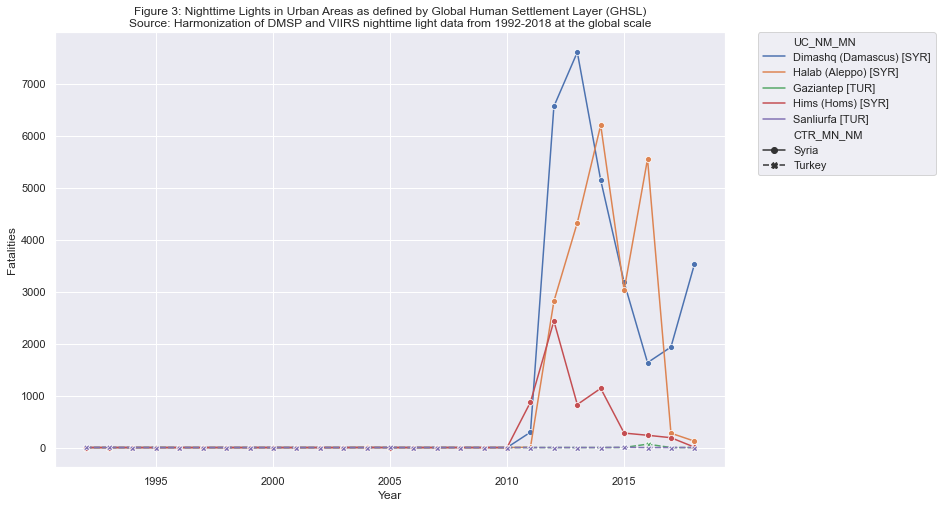

In [25]:
filtered_merged = merged[merged['UC_NM_MN'].isin(city_list)]

h = plt.figure(figsize=(12, 8))

# Plot the responses for different events and regions

ax = sns.lineplot(x="year", y="best", data=filtered_merged, hue="UC_NM_MN", style="CTR_MN_NM",markers=True)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('''Figure 3: Nighttime Lights in Urban Areas as defined by Global Human Settlement Layer (GHSL)
Source: Harmonization of DMSP and VIIRS nighttime light data from 1992-2018 at the global scale''')

ax.set_ylabel('Fatalities')
ax.set_xlabel('Year')

plt.savefig('NTL_figure3.png', bbox_inches='tight')  

In [48]:
other_list = [
        'Caracas [VEN]', 
        "Sana'a' [YEM]", 
        'Muqdisho (Mogadishu) [SOM]',
        'Bayrut (Beirut) [LBN]',
        'Amman [JOR]',
        'Irbid [JOR]',
        'Ramtha [JOR]',
        'Natal [BRA]', 
        'Qui Nhon [VNM]',
        'Thiruvananthapuram [IND]',
        'Bloemfontein [ZAF]']  

afg_list=[
        'Kabul [AFG]',  
        'Kandahar [AFG]', 
        'Herat [AFG]',]

irq_list=[
        'Baghdad [IRQ]', 
        'Al-Mawsil (Mosul) [IRQ]',
        'Kirkuk [IRQ]',
        'Irbil (Erbil) [IRQ]',
        'Dahuk [IRQ]',
        'Sinjar [IRQ]',]

tur_list =[
        'Gaziantep [TUR]', 
        'Sanliurfa [TUR]', 
        'Diyarbakir [TUR]',
        'Kilis [TUR]']

syr_list=[
        'Al-Hasakah [SYR]',
        'Halab (Aleppo) [SYR]',
        'Al-Raqqa [SYR]',
        "As-Suwayda' [SYR]",
        'Dimashq (Damascus) [SYR]',
        "Dar'A [SYR]",
        'Deir El-Zor(Deir ez-Zor) [SYR]',
        'Hamah [SYR]',
        'Hims (Homs) [SYR]',
        'Idlib [SYR]',
        'Lattakia [SYR]',
        'Tartus [SYR]',]    

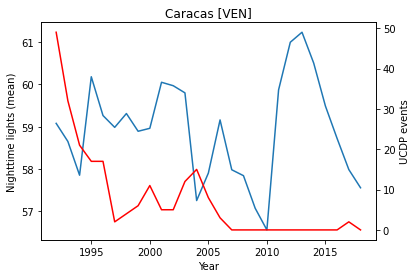

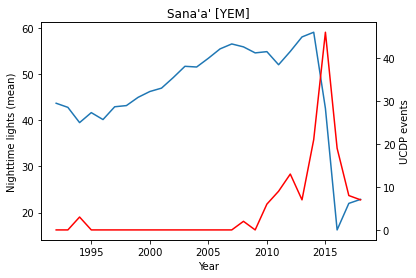

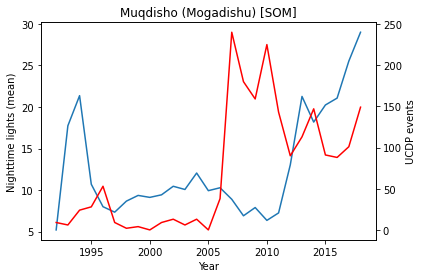

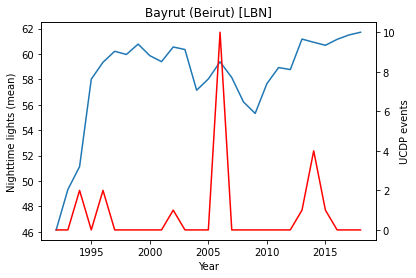

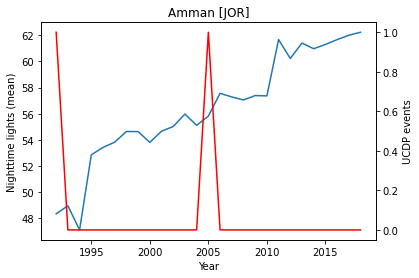

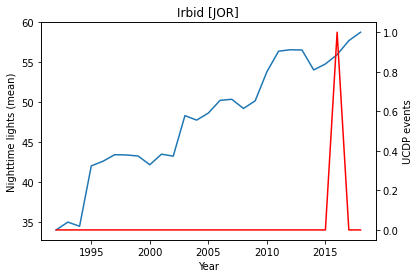

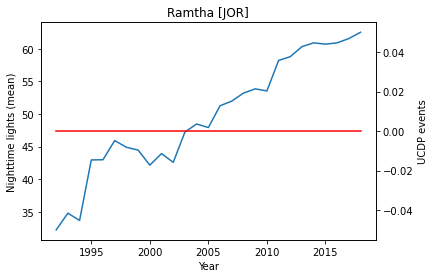

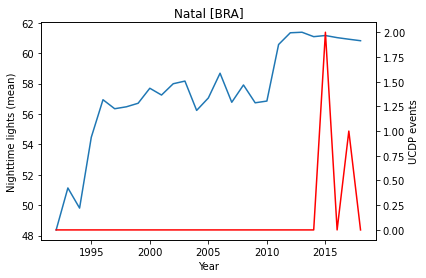

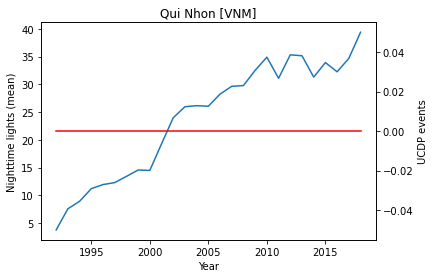

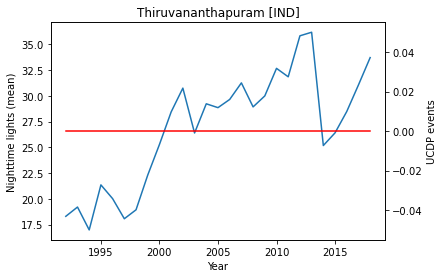

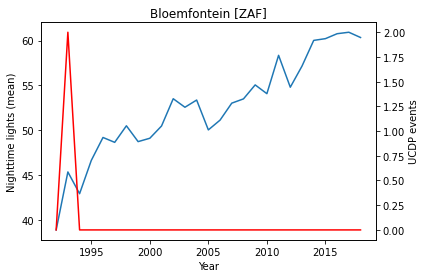

In [49]:
var = 'mean'
for c in other_list: 
    title = c
    filtered_merged = merged[merged['UC_NM_MN']==title]
    i, ax = plt.subplots()
    ax2 = ax.twinx()
    sns.lineplot(x='year', y=var, data=filtered_merged, ax=ax)
    #.ylim(0, 63)
    # sns.lineplot(x='year', y='max', data=filtered_merged, ax=ax)
    sns.lineplot(x='year', y='count_events', data=filtered_merged, ax=ax2, color='r')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    ax.set_ylabel('Nighttime lights (' +var + ')')
    ax2.set_ylabel('UCDP events')
    ax.set_xlabel('Year')
    ax.set_title(title)
    plt.savefig('figure 4/NTL_figure4_'+title+'_'+var+'.pdf', bbox_inches='tight')  

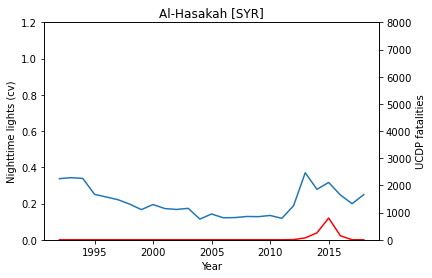

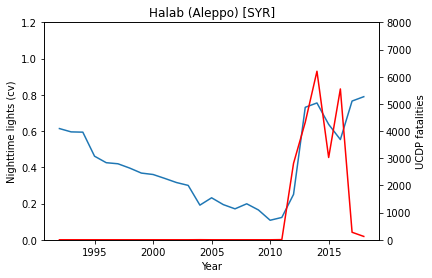

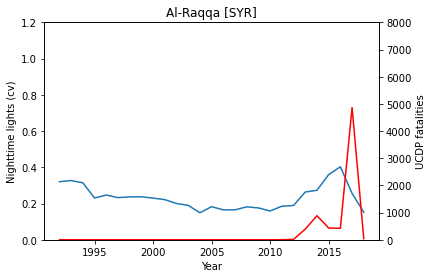

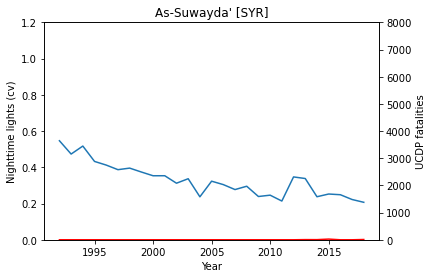

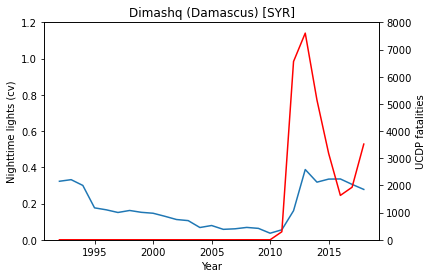

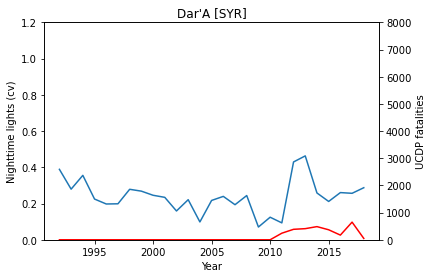

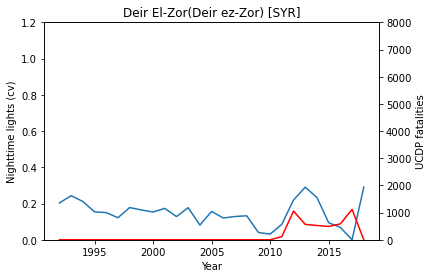

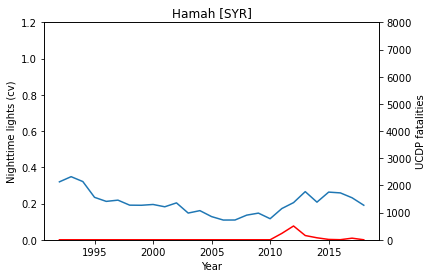

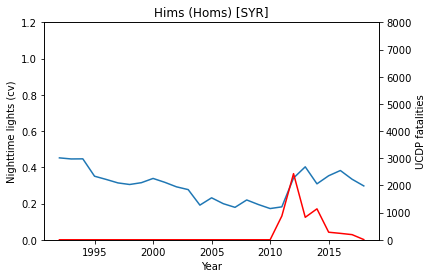

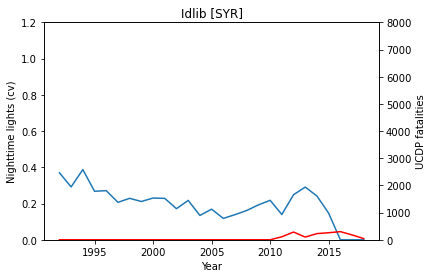

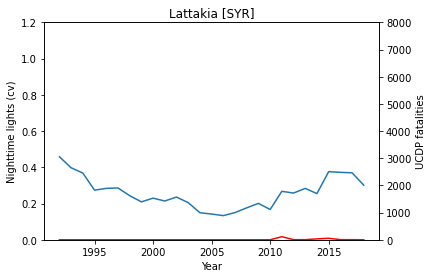

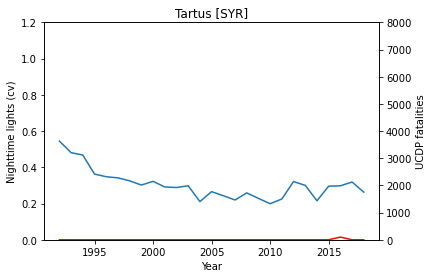

In [69]:
        
var = 'cv'
for c in syr_list: 
    title = c
    filtered_merged = merged[merged['UC_NM_MN']==title]
    i, ax = plt.subplots()
    ax2 = ax.twinx()
    sns.lineplot(x='year', y=var, data=filtered_merged, ax=ax)
    # sns.lineplot(x='year', y='max', data=filtered_merged, ax=ax)
    sns.lineplot(x='year', y='best', data=filtered_merged, ax=ax2, color='r')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    ax.set_ylim([0,1.2])
    #ax.set_ylim([0,63])

    ax2.set_ylim([-1,8000])
    ax.set_ylabel('Nighttime lights (' +var + ')')
    ax2.set_ylabel('UCDP fatalities')
    ax.set_xlabel('Year')
    ax.set_title(title)
    plt.savefig('figure 5/NTL_figure5_'+title+'_'+var+'.pdf', bbox_inches='tight')  

In [80]:
kallio_q = "Kallio, Helsinki, Finland"
pihlajamaki_q = "Pihlajamäki, Malmi, Helsinki, Finland"
kallio = ox.geometries.geometries_from_place(kallio_q,{'city':True})
pihlajamaki = ox.geometries.geometries_from_place(pihlajamaki_q,{'city':True})

In [83]:
stats = zonal_stats("tests/data/polygons.shp","Harmonized_DN_NTL_1992_calDMSP.tif",stats=['min', 'max', 'median', 'majority', 'sum'])

RasterioIOError: tests/data/slope.tif: No such file or directory

from os import walk
mypath = '/Users/javierparada/Documents/GIS/Rasters/NTL/9828827/'

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
f.sort()
f